In [42]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [43]:
df = pd.read_csv("https://raw.githubusercontent.com/benvictoria17/DataAnalytics/master/dataset/Data%20Science%20Job%20Posting%20on%20Glassdoor/Cleaned_DS_Jobs.csv")
df.head()

,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Type of ownership,Industry,...,company_age,python,excel,hadoop,spark,aws,tableau,big_data,job_simp,seniority
0,Sr Data Scientist,137-171,Description\n\nThe Senior Data Scientist is re...,3.1,Healthfirst,"New York, NY","New York, NY",1001 to 5000 employees,Nonprofit Organization,Insurance Carriers,...,27,0,0,0,0,1,0,0,data scientist,senior
1,Data Scientist,137-171,"Secure our Nation, Ignite your Future\n\nJoin ...",4.2,ManTech,"Chantilly, VA","Herndon, VA",5001 to 10000 employees,Company - Public,Research & Development,...,52,0,0,1,0,0,0,1,data scientist,na
2,Data Scientist,137-171,Overview\n\n\nAnalysis Group is one of the lar...,3.8,Analysis Group,"Boston, MA","Boston, MA",1001 to 5000 employees,Private Practice / Firm,Consulting,...,39,1,1,0,0,1,0,0,data scientist,na
3,Data Scientist,137-171,JOB DESCRIPTION:\n\nDo you have a passion for ...,3.5,INFICON,"Newton, MA","Bad Ragaz, Switzerland",501 to 1000 employees,Company - Public,Electrical & Electronic Manufacturing,...,20,1,1,0,0,1,0,0,data scientist,na
4,Data Scientist,137-171,Data Scientist\nAffinity Solutions / Marketing...,2.9,Affinity Solutions,"New York, NY","New York, NY",51 to 200 employees,Company - Private,Advertising & Marketing,...,22,1,1,0,0,0,0,0,data scientist,na


In [44]:
def get_unique_col_count(col):
    return "There are " + str(df[col].nunique()) + " unique values for " + col

In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 660 entries, 0 to 659
Data columns (total 27 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Job Title          660 non-null    object 
 1   Salary Estimate    660 non-null    object 
 2   Job Description    660 non-null    object 
 3   Rating             660 non-null    float64
 4   Company Name       660 non-null    object 
 5   Location           660 non-null    object 
 6   Headquarters       660 non-null    object 
 7   Size               660 non-null    object 
 8   Type of ownership  660 non-null    object 
 9   Industry           660 non-null    object 
 10  Sector             660 non-null    object 
 11  Revenue            660 non-null    object 
 12  min_salary         660 non-null    int64  
 13  max_salary         660 non-null    int64  
 14  avg_salary         660 non-null    int64  
 15  job_state          660 non-null    object 
 16  same_state         660 non

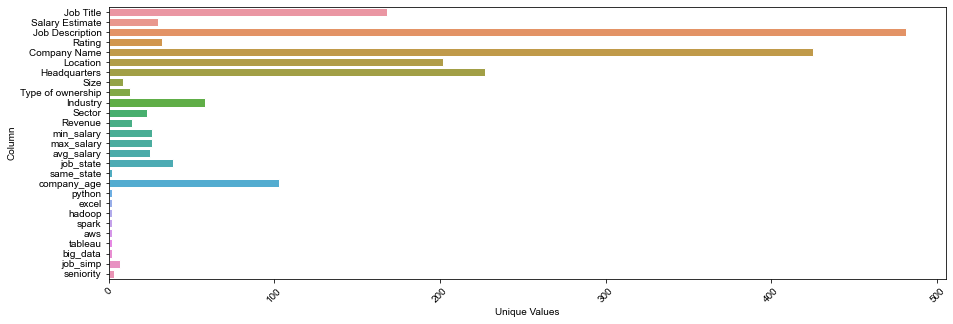

In [46]:
uniques = df.nunique().reset_index()
uniques.columns = ['Column','Unique Values']
fig, ax = plt.subplots(nrows=1, ncols= 1, figsize=(15,5))
sns.set_theme(style="darkgrid")
ax = sns.barplot(y='Column', x='Unique Values', data=uniques)
plt.xticks(rotation=45);

In [47]:
print(get_unique_col_count('Job Title'))

There are 168 unique values for Job Title


There are 30 unique values for Salary Estimate


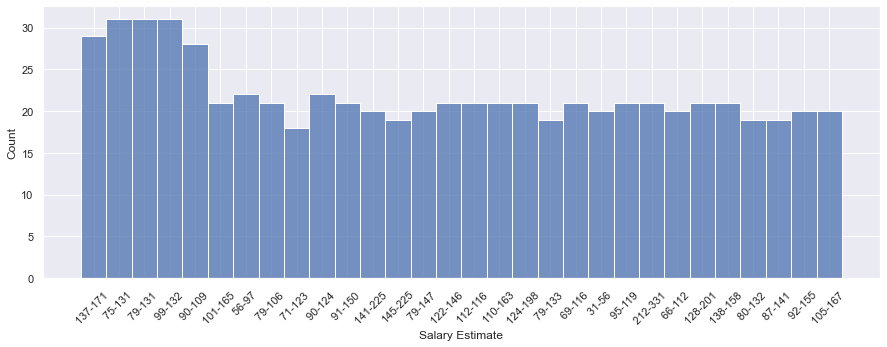

In [48]:
print(get_unique_col_count('Salary Estimate'))

fig, ax = plt.subplots(nrows=1, ncols= 1, figsize=(15,5))
sns.histplot(ax=ax, data=df['Salary Estimate']);
plt.xticks(rotation=45);

In [49]:
print(get_unique_col_count('Job Description'))

There are 481 unique values for Job Description


There are 32 unique values for Rating


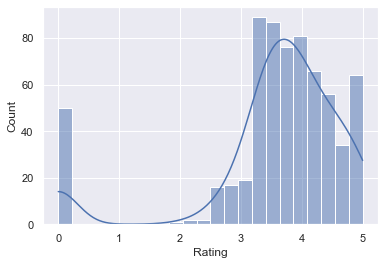

In [50]:
print(get_unique_col_count('Rating'))
sns.histplot(df['Rating'], kde=True);

In [51]:
print(get_unique_col_count('Company Name'))

There are 425 unique values for Company Name


There are 202 unique values for Location
38 states and 199 cities are represented


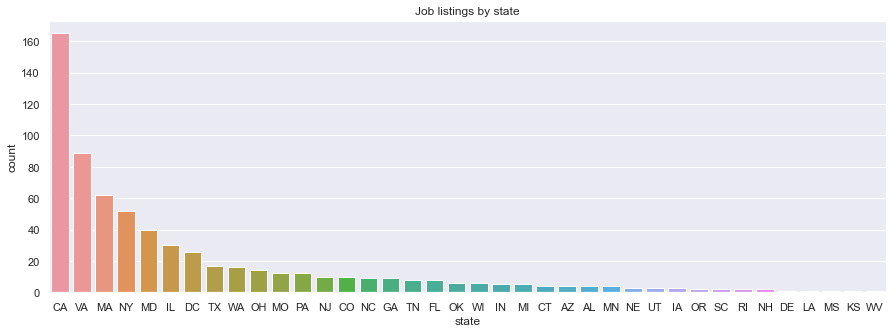

In [52]:
print(get_unique_col_count('Location'))

split_data = df["Location"].str.rsplit(", ", 1)
data = split_data.to_list()

locations = pd.DataFrame(data, columns=["city","state"])
print(str(locations['state'].nunique()) + " states and " + str(locations['city'].nunique()) + " cities are represented")

fig, ax = plt.subplots(nrows=1, ncols= 1, figsize=(15,5))
sns.countplot(x='state', data=locations, order = locations['state'].value_counts().index);
ax.set(title='Job listings by state');

In [53]:
dupe_rows = locations.groupby(locations.columns.tolist(),as_index=False).size()
dupe_rows = dupe_rows[dupe_rows['size'] > 1]

print(str(len(dupe_rows)) + " cities have more than one listing, with the median count per city being " + str(dupe_rows['size'].median()))

103 cities have more than one listing, with the median count per city being 3.0


In [54]:
print(get_unique_col_count('Headquarters'))

There are 227 unique values for Headquarters


There are 9 unique values for Size


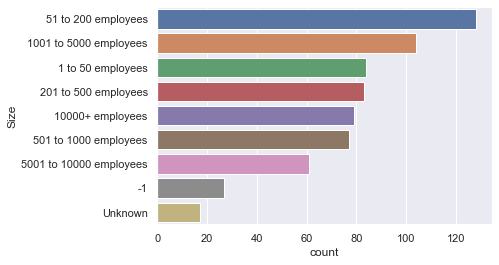

In [55]:
print(get_unique_col_count('Size'))
sns.countplot(y='Size',data=df,order = df['Size'].value_counts().index);

There are 13 unique values for Type of ownership


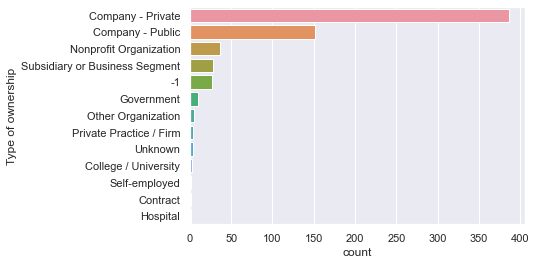

In [56]:
print(get_unique_col_count('Type of ownership'))
sns.countplot(y='Type of ownership',data=df, order= df['Type of ownership'].value_counts().index);

There are 58 unique values for Industry


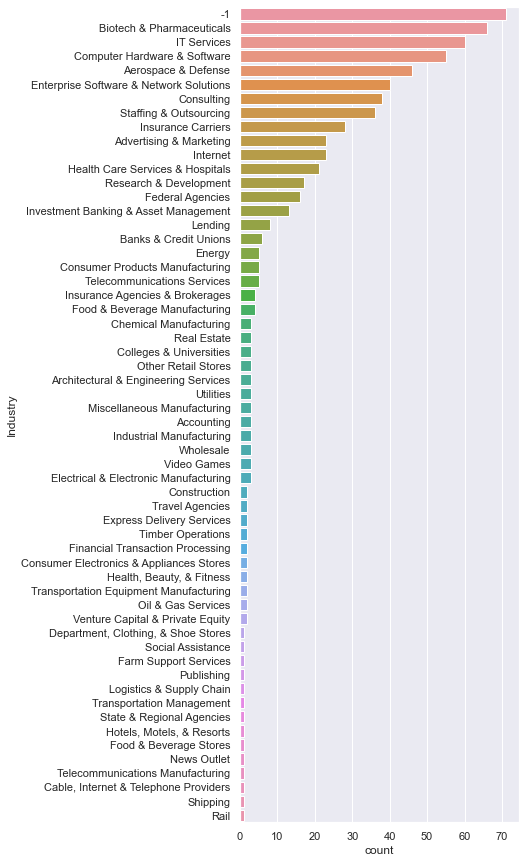

In [57]:
print(get_unique_col_count('Industry'))
fig, ax = plt.subplots(nrows=1, ncols= 1, figsize=(5,15))
sns.countplot(y='Industry',data=df, order= df['Industry'].value_counts().index);

There are 23 unique values for Sector


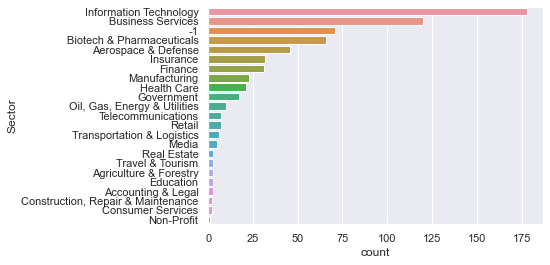

In [58]:
print(get_unique_col_count('Sector'))
sns.countplot(y='Sector',data=df, order= df['Sector'].value_counts().index);

There are 14 unique values for Revenue


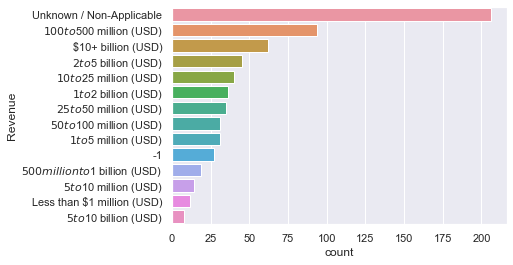

In [59]:
print(get_unique_col_count('Revenue'))
sns.countplot(y='Revenue',data=df, order= df['Revenue'].value_counts().index);

There are 26 unique values for min_salary
There are 25 unique values for avg_salary
There are 26 unique values for max_salary


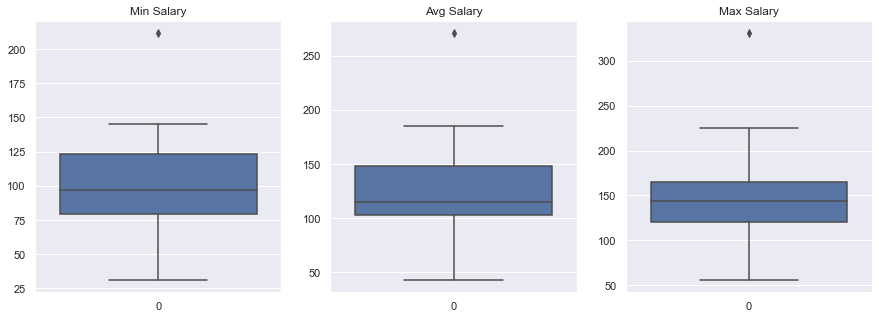

In [60]:
print(get_unique_col_count('min_salary'))
print(get_unique_col_count('avg_salary'))
print(get_unique_col_count('max_salary'))

fig, ax = plt.subplots(nrows=1, ncols= 3, figsize=(15,5))

sns.boxplot(data=df['min_salary'].unique(), ax=ax[0], orient="v");
sns.boxplot(data=df['avg_salary'].unique(), ax=ax[1], orient="v");
sns.boxplot(data=df['max_salary'].unique(), ax=ax[2], orient="v");

ax[0].set(title='Min Salary');
ax[1].set(title='Avg Salary');
ax[2].set(title='Max Salary');

There are 39 unique values for job_state


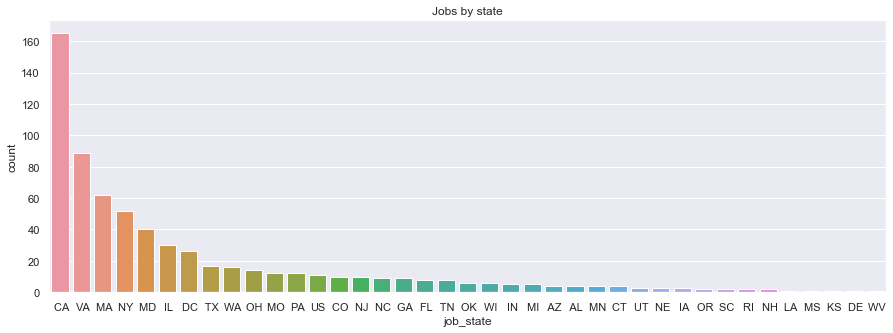

In [61]:
print(get_unique_col_count('job_state'))
fig, ax = plt.subplots(nrows=1, ncols= 1, figsize=(15,5))
sns.countplot(x='job_state',data=df, order= df['job_state'].value_counts().index);
ax.set(title='Jobs by state');

There are 2 unique values for same_state


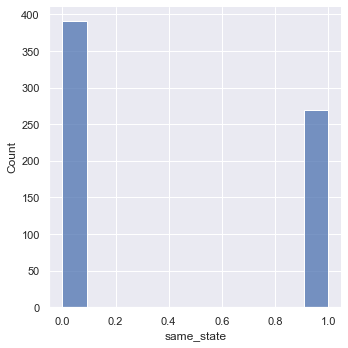

In [62]:
print(get_unique_col_count('same_state'))
sns.displot(data=df['same_state']);

There are 103 unique values for company_age


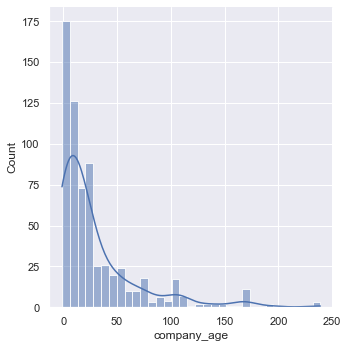

In [63]:
print(get_unique_col_count('company_age'))
sns.displot(data=df['company_age'], kde=True);

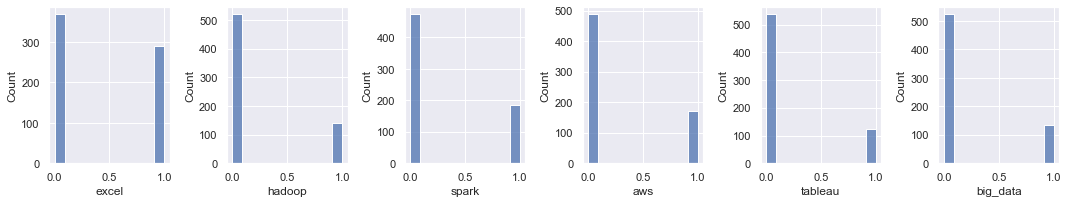

In [64]:
fig, ax = plt.subplots(nrows=1, ncols= 6, figsize=(15,3))
sns.histplot(data=df['excel'], ax=ax[0]);
sns.histplot(data=df['hadoop'], ax=ax[1]);
sns.histplot(data=df['spark'], ax=ax[2]);
sns.histplot(data=df['aws'], ax=ax[3]);
sns.histplot(data=df['tableau'], ax=ax[4]);
sns.histplot(data=df['big_data'], ax=ax[5]);
fig.tight_layout()

There are 7 unique values for job_simp


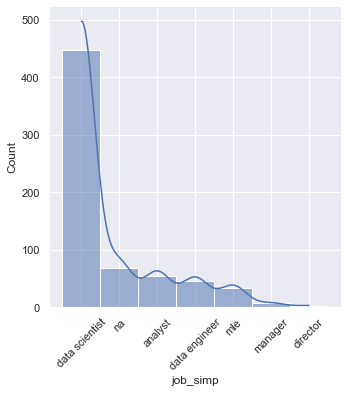

In [65]:
print(get_unique_col_count('job_simp'))
sns.displot(data=df['job_simp'], kde=True);
plt.xticks(rotation=45);

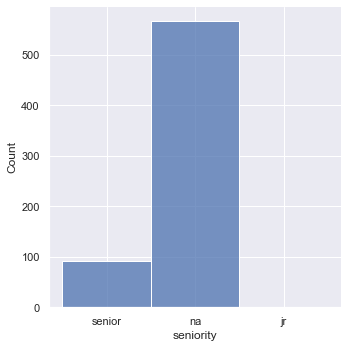

In [66]:
sns.displot(df['seniority']);

In [67]:
df.corr()

,Rating,min_salary,max_salary,avg_salary,same_state,company_age,python,excel,hadoop,spark,aws,tableau,big_data
Rating,1.000000,-0.059330,-0.069939,-0.067593,0.147265,0.102369,0.088802,-0.027457,0.060987,-0.030360,-0.124440,0.009354,0.066549
min_salary,-0.059330,1.000000,0.905321,0.966302,-0.081132,-0.043297,-0.035663,-0.039179,0.020516,0.033414,-0.033028,0.012812,-0.012027
max_salary,-0.069939,0.905321,1.000000,0.984113,-0.094183,-0.045022,-0.001581,0.005901,0.040252,0.006419,-0.048013,0.033524,-0.003030
avg_salary,-0.067593,0.966302,0.984113,1.000000,-0.091182,-0.045390,-0.015633,-0.012905,0.032750,0.017717,-0.042827,0.025656,-0.006619
same_state,0.147265,-0.081132,-0.094183,-0.091182,1.000000,-0.021037,-0.051771,0.039718,-0.045712,-0.053522,-0.014772,0.033964,-0.087137
company_age,0.102369,-0.043297,-0.045022,-0.045390,-0.021037,1.000000,-0.058250,0.024786,0.069391,0.041367,-0.006833,-0.018551,0.013751
python,0.088802,-0.035663,-0.001581,-0.015633,-0.051771,-0.058250,1.000000,0.030818,0.198402,0.228901,0.174120,0.104688,0.140780
excel,-0.027457,-0.039179,0.005901,-0.012905,0.039718,0.024786,0.030818,1.000000,0.016965,-0.047545,0.015042,0.182462,0.068178
hadoop,0.060987,0.020516,0.040252,0.032750,-0.045712,0.069391,0.198402,0.016965,1.000000,0.531739,0.190099,0.115732,0.358750
spark,-0.030360,0.033414,0.006419,0.017717,-0.053522,0.041367,0.228901,-0.047545,0.531739,1.000000,0.310936,0.005363,0.322009


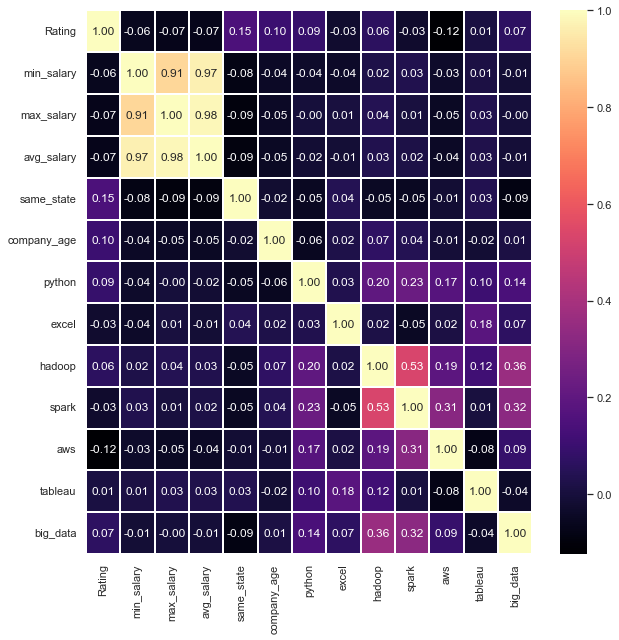

In [68]:
fig,ax = plt.subplots(figsize=(10, 10))   
sns.heatmap(df.corr(), ax=ax, annot=True, linewidths=0.05, fmt= '.2f',cmap="magma");

In [69]:
df.skew()

<ipython-input-69-9e0b1e29546f>:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.skew()


Rating        -1.920359
min_salary     1.081176
max_salary     1.703888
avg_salary     1.518127
same_state     0.377037
company_age    2.303611
python        -1.040229
excel          0.238574
hadoop         1.411584
spark          0.972155
aws            1.093205
tableau        1.627463
big_data       1.456751
dtype: float64

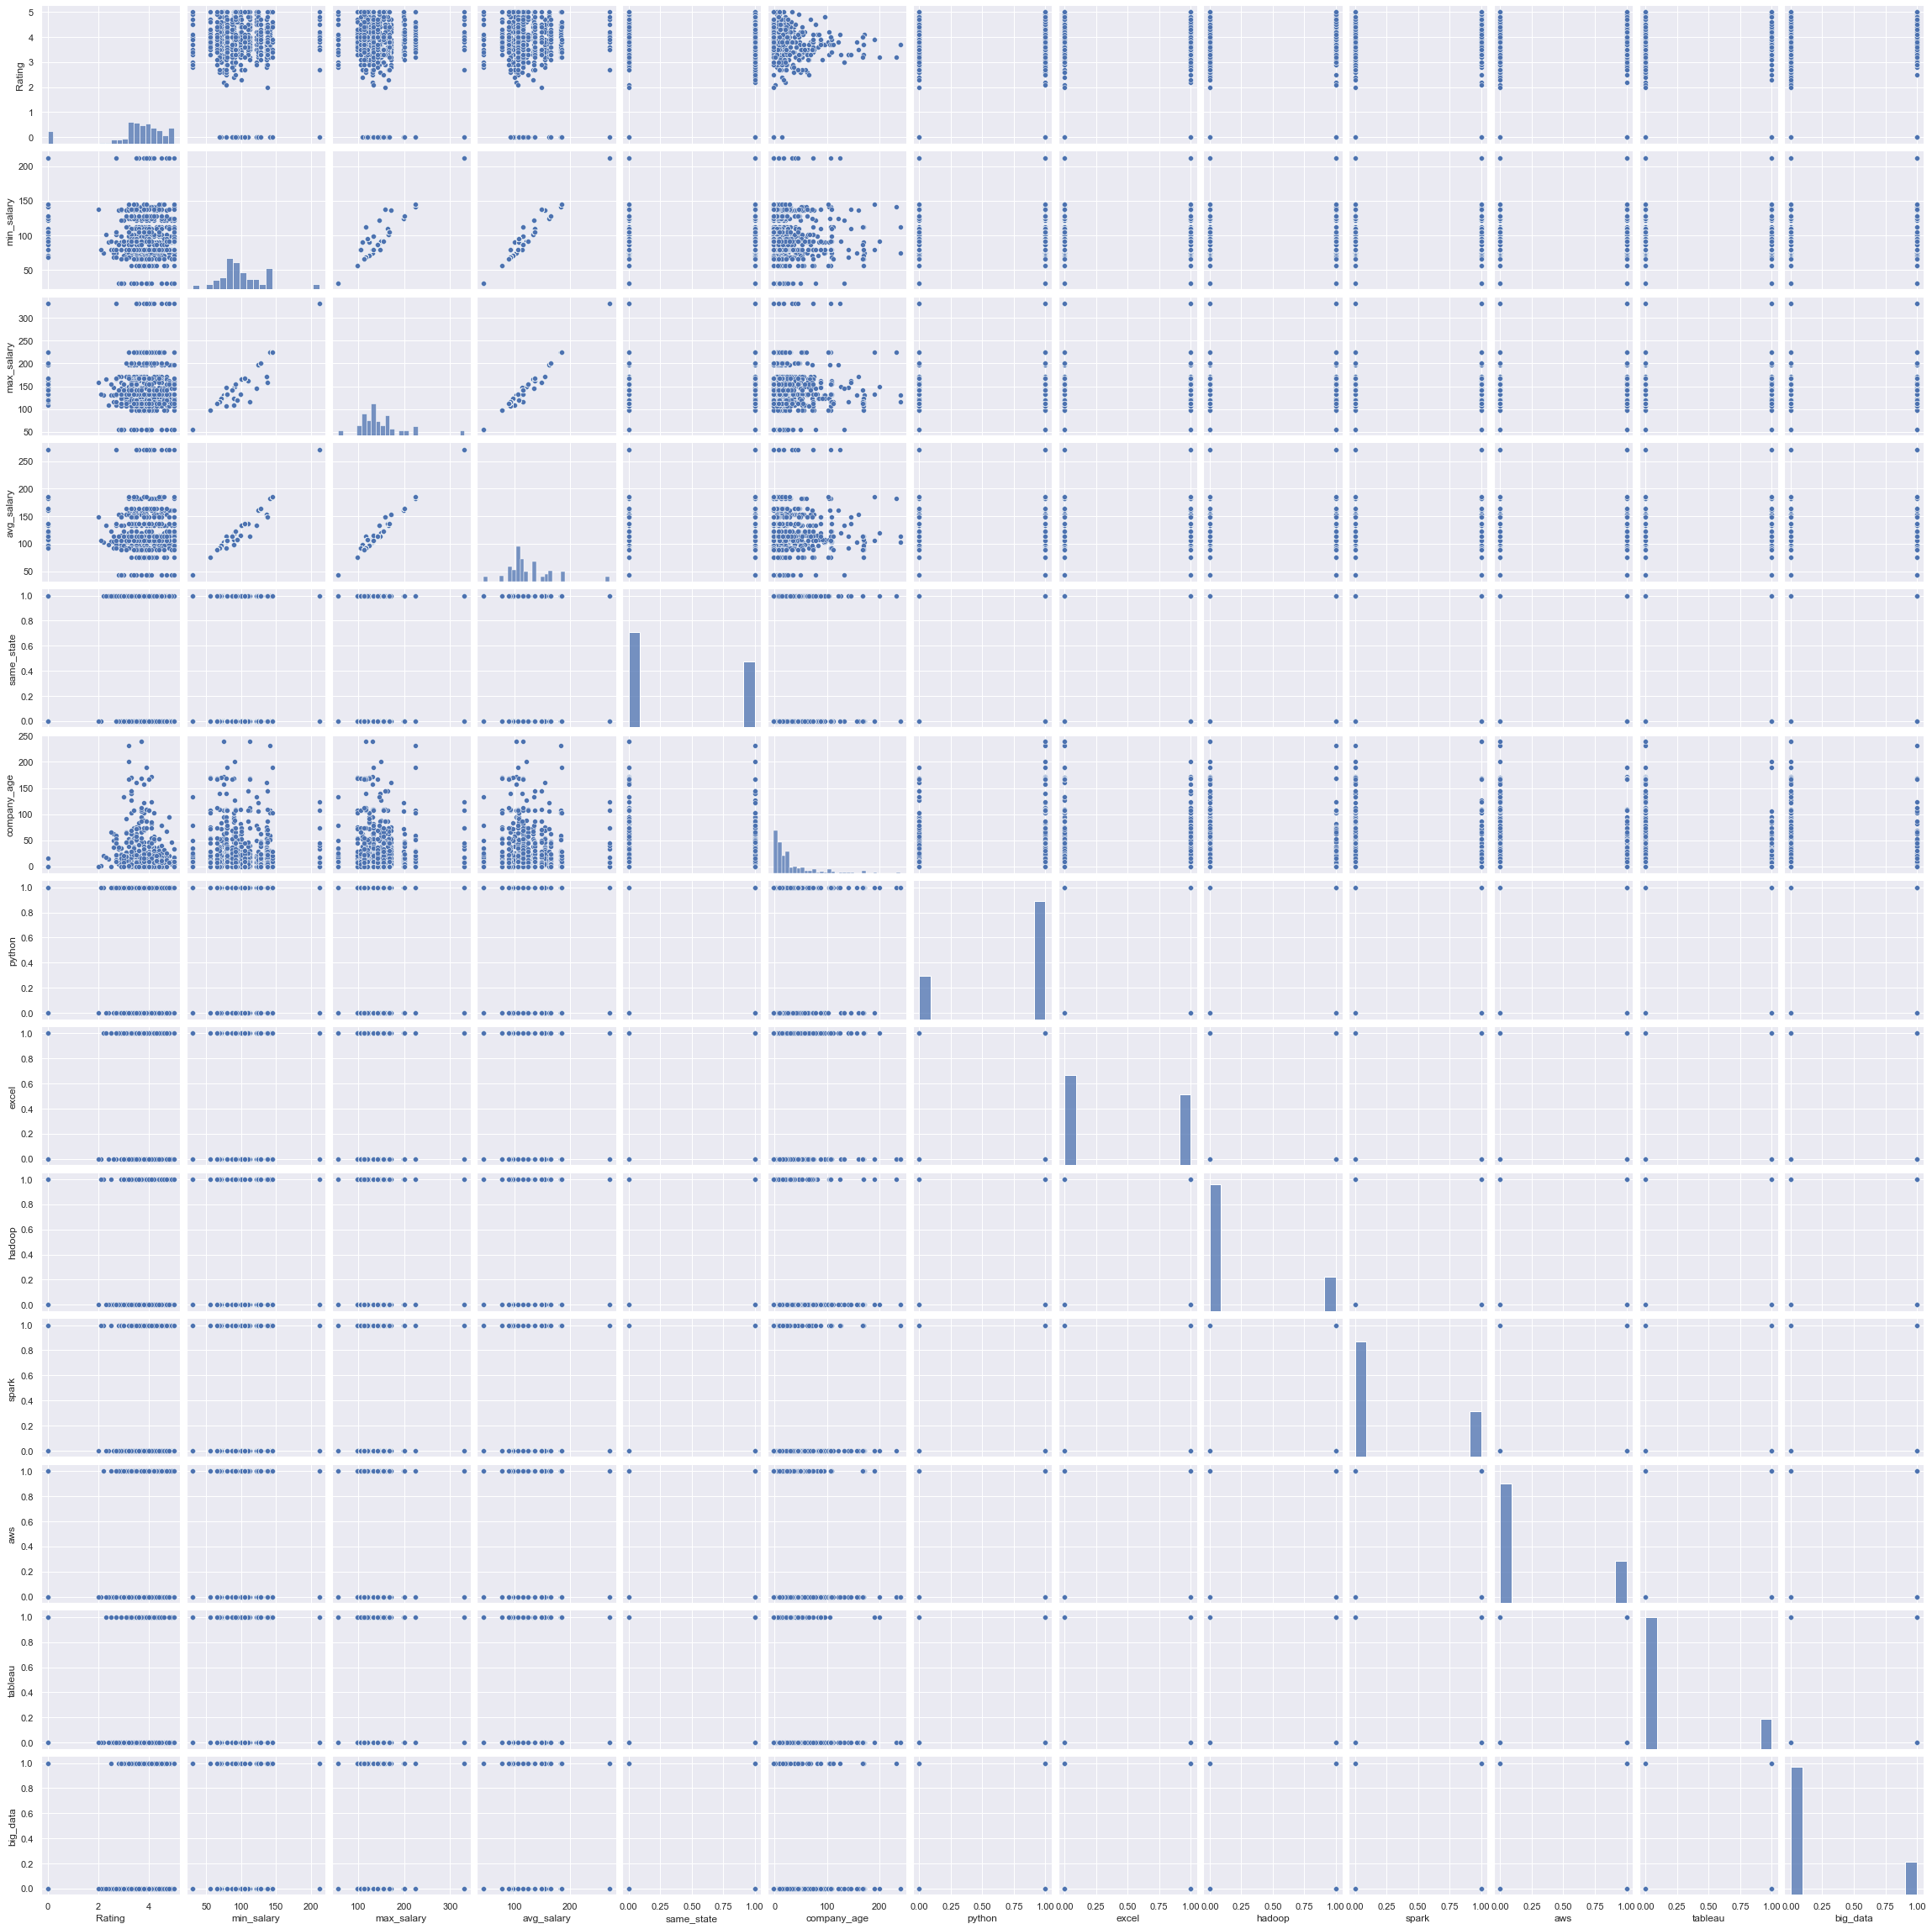

In [70]:
sns.pairplot(data=df);